In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('medical_examination.csv')

In [5]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [6]:
df.plot

In [7]:
import matplotlib.pyplot as plt

In [8]:
df.hist

<bound method hist_frame of           id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0         

In [9]:
df['cholesterol', 'gluc', 'alco', 'active','smoke'].plot(kind='hist', bins=10, edgecolor='black')

# Step 3: Add labels and title
plt.xlabel('variable')
plt.ylabel('total')
plt.title('cardio=0')

# Step 4: Show the plot
plt.show()

KeyError: ('cholesterol', 'gluc', 'alco', 'active', 'smoke')

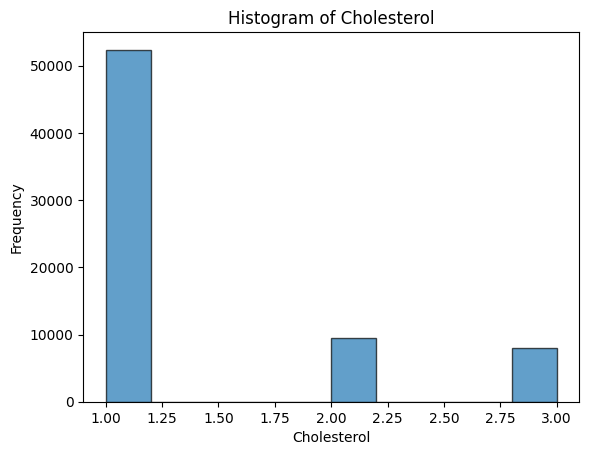

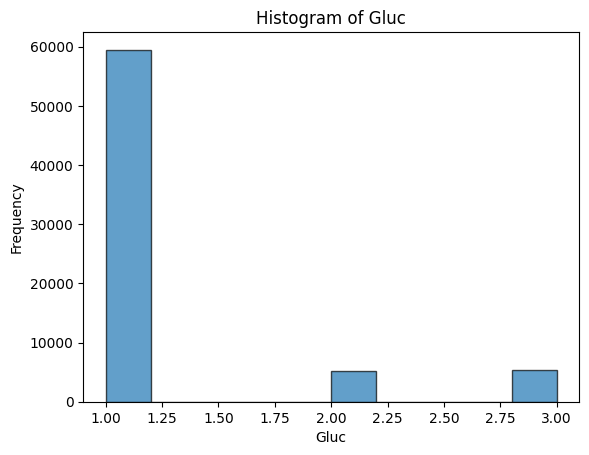

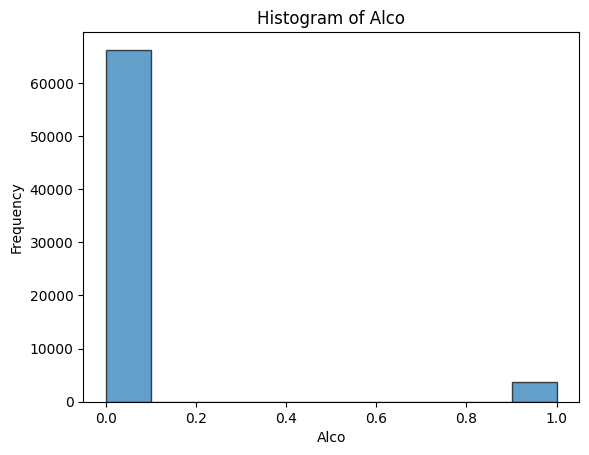

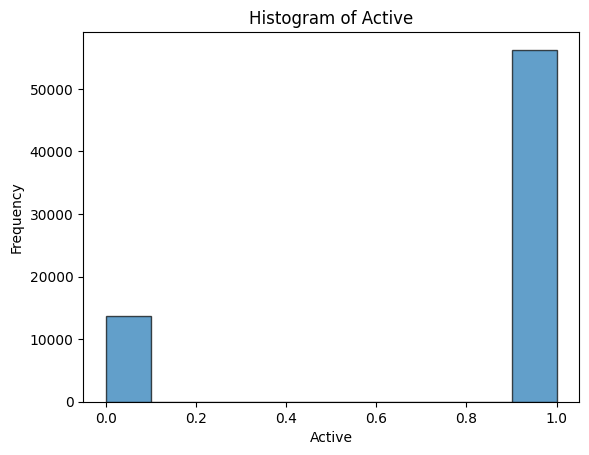

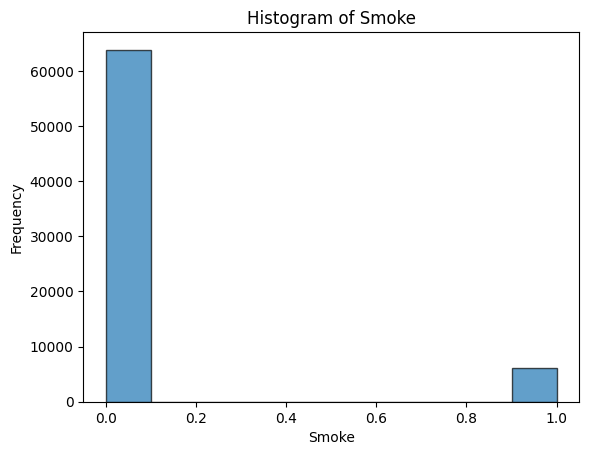

In [10]:
variables = ['cholesterol', 'gluc', 'alco', 'active', 'smoke']

for var in variables:
    df[var].plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var.capitalize()}')
    plt.show()

In [13]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
import seaborn as sns

### Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

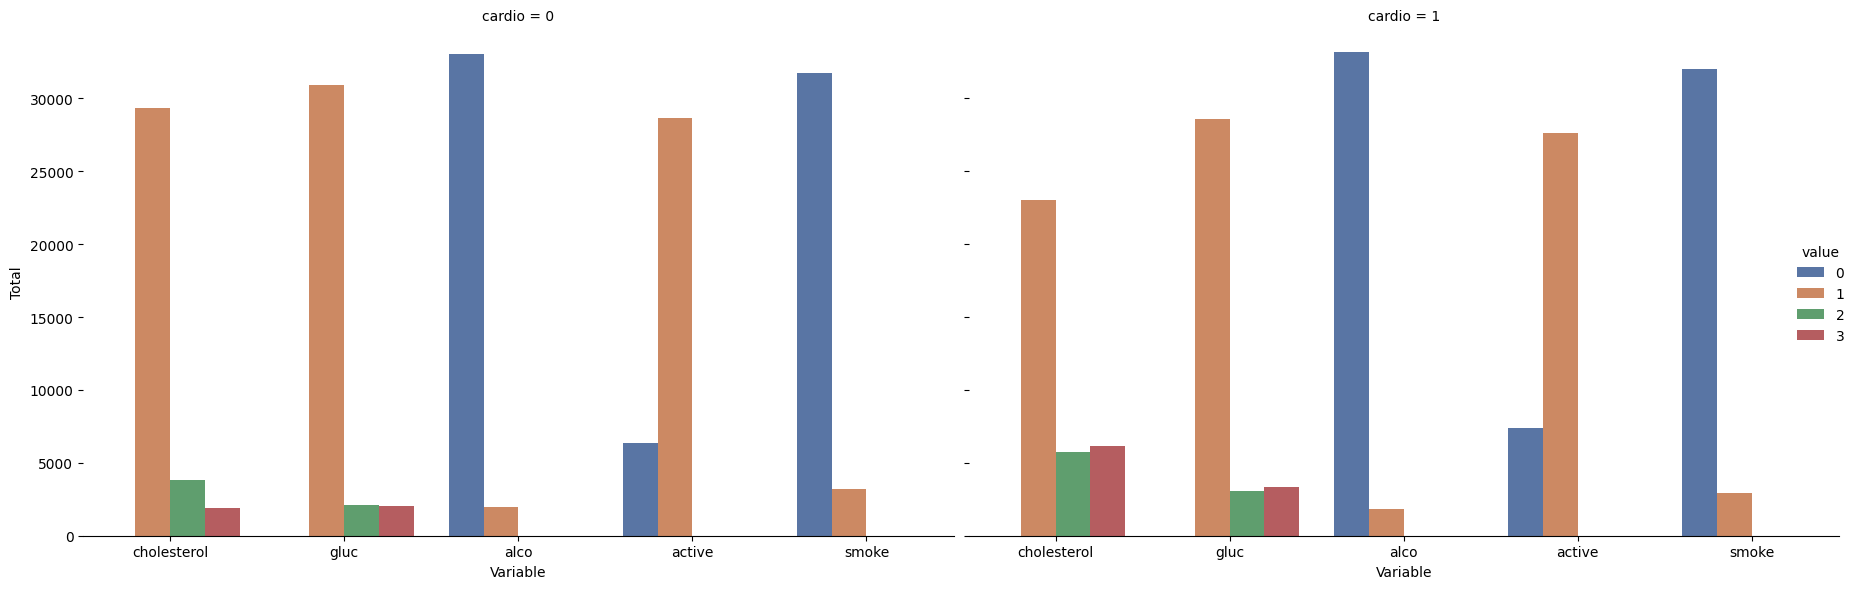

In [15]:
df_melted = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke'])

# Step 3: Create the plot
g = sns.catplot(x='variable', hue='value', col='cardio', data=df_melted, kind='count', height=6, aspect=1.5, palette='deep')
g.set_axis_labels('Variable', 'Total')
g.set_titles('cardio = {col_name}')
g.despine(left=True)

# Step 4: Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [22]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [23]:
df['bmi']=df['weight']/(df['height']/100)

In [25]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,36.904762
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,54.487179


In [26]:
df['overweight']= df['bmi'].apply(lambda x:1 if x>25 else 0)

In [49]:
df.drop(['bmi'],axis=1,inplace=True)

In [51]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1


### Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [43]:
df['cholesterol']=df['cholesterol'].apply(lambda x:0 if x==1 else 1)

In [46]:
columns_to_change = ['cholesterol', 'gluc']

# Apply the function to the selected columns
df[columns_to_change] = df[columns_to_change].applymap(lambda x: 0 if x == 1 else 1)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,36.904762,1
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,54.487179,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,38.787879,1
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,48.520710,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,35.897436,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,45.238095,1
69996,99995,22601,1,158,126.0,140,90,0,1,0,0,1,1,79.746835,1
69997,99996,19066,2,183,105.0,180,90,0,0,0,1,0,1,57.377049,1
69998,99998,22431,1,163,72.0,135,80,1,1,0,0,0,1,44.171779,1


In [47]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,36.904762,1
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,54.487179,1


In [44]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,36.904762,1
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,54.487179,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,38.787879,1
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,48.520710,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,35.897436,1
